In [20]:
import os
import os.path
import cv2
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean 
from insightface.embedder import InsightfaceEmbedder
import numpy as np
from face_detection import RetinaFace
import math


In [10]:
detector = RetinaFace() 

In [11]:
model_path = "model-r100-ii/model"
embedder = InsightfaceEmbedder(model_path=model_path, epoch_num='0000', image_size=(112, 112))

loading model-r100-ii/model 0


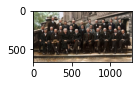

In [59]:
photo = cv2.imread("./allprof.jpg")
fig = plt.figure()
a=fig.add_subplot(1, 3, 1)
plt.imshow(photo[:,:, ::-1])

C:\Users\ksvet\miniconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app


18


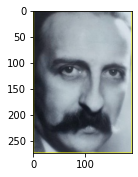

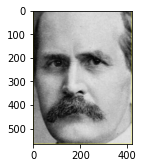

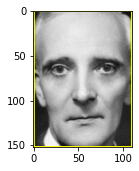

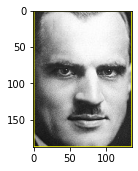

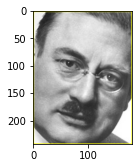

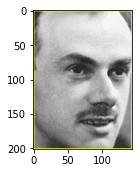

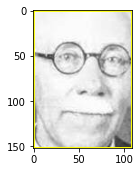

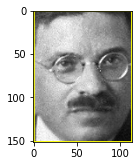

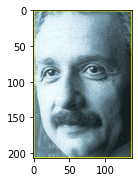

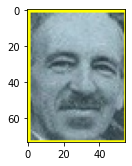

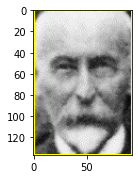

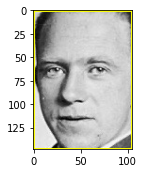

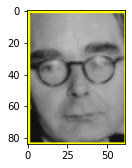

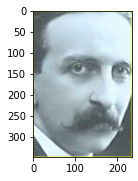

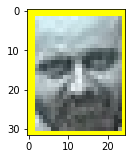

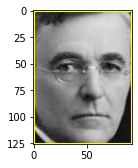

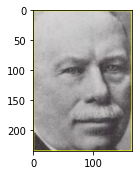

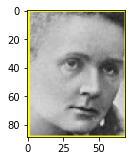

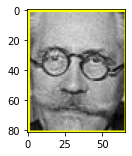

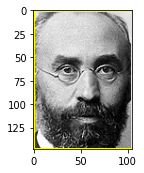

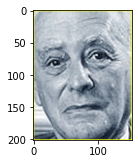

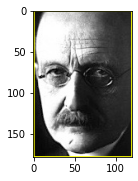

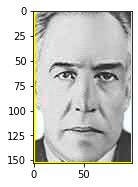

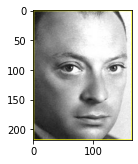

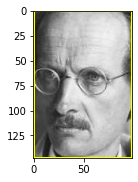

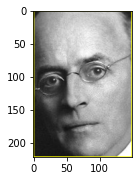

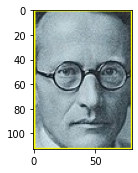

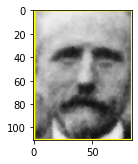

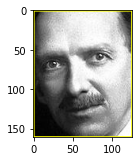

In [66]:
detector = RetinaFace()
portraits = os.listdir(path="./portraits/")
portraits_embeddings = []
N=29
for i in range(len(portraits)):

    p='./portraits/'+portraits[i]
    im = cv2.imread(p)
    face = detector(im)
    
    box, landmarks, score = face[0]
    x, y, w, h = box
    cv2.rectangle(im, (int(x), int(y)), (int(w), int(h)), (255, 255, 0), 2)
    sub_face = im[int(y):int(h), int(x):int(w)]
    fig = plt.figure()
    a=fig.add_subplot(1, 3, 1)
    plt.imshow(sub_face)
    try:
        portraits_embeddings.append(embedder.embed_image(sub_face))
    except Exception:
        N = N - 1
print(N)


In [68]:
print(len(portraits_embeddings))

18


C:\Users\ksvet\miniconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


Exception: No face detected!

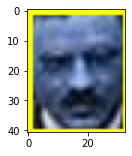

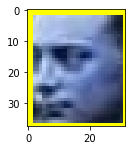

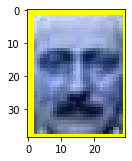

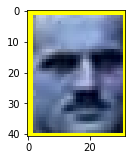

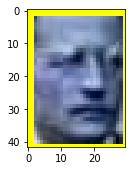

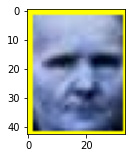

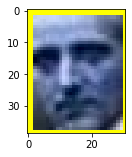

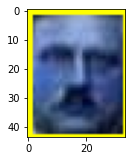

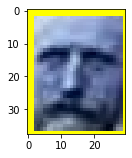

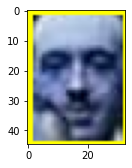

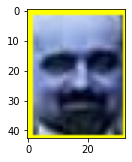

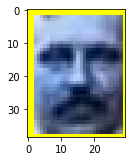

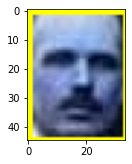

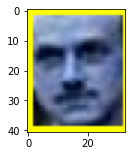

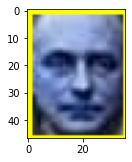

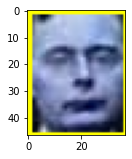

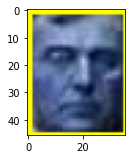

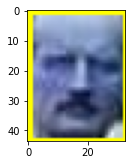

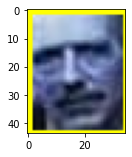

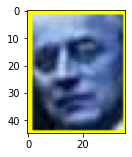

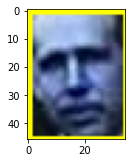

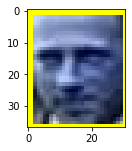

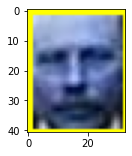

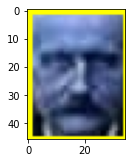

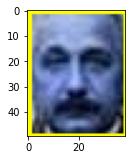

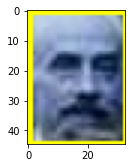

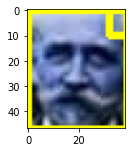

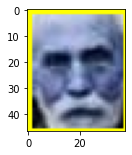

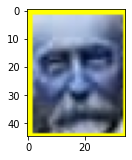

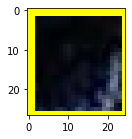

In [63]:
detector = RetinaFace()
faces = detector(photo)
prof_emb=[]
for i in range(len(faces)):
    box, landmarks, score = faces[i]
    x, y, w, h = box
    for box in faces:
        cv2.rectangle(photo, (int(x), int(y)), (int(w), int(h)), (255, 255, 0), 2)
    cv2.imwrite("face_detected.jpeg", photo)
    sub_face = photo[int(y):int(h), int(x):int(w)]
    fig = plt.figure()
    a=fig.add_subplot(1, 3, 1)
    plt.imshow(sub_face)
    prof_emb.append(embedder.embed_image(sub_face))

In [64]:
print(len(prof_emb))

29


In [21]:
def cos_similar(a1,a2):
#     a1 to a2 = (a1 dot a2)/{||a1||*||a2||)"
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(a1)):
        x = a1[i]; y = a2[i]
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
    return sumxy/math.sqrt(sumxx*sumyy)

In [69]:
kuri=prof_emb[0]
res=0
maxi=0
maxi_ind=0
for i in range(len(portraits_embeddings)):
    res=cos_similar(kuri,portraits_embeddings[i])
    if res>maxi:
        maxi=res
        maxi_ind=i
print(maxi, maxi_ind)

0.4450696639063599 5


In [71]:
p1= cv2.imread("./allprof.jpg")

allprof_embeddings = []
faces=detector(p1)
fontScale = 0.5
font = cv2.FONT_HERSHEY_SIMPLEX 
for i in range(len(faces)):
    box, landmarks, score = faces[i]
    x, y, w, h = box
    allprof_embeddings.append(box)
    k=allprof_embeddings[i]
    
    maxres=0
    maxres_ind_name=0
    for j in range(len(portraits_embeddings)):
        res=cos_similar(k,portraits_embeddings[j])
        if res>maxres:
            maxres=res
            maxres_ind_name=j
    print(maxres)
    if maxres>0.7:
        for box in faces[i]:
            cv2.rectangle(p1, (int(x), int(y)), (int(w), int(h)), (255, 255, 0), 2)
 
        name=portraits[maxres_ind_name]
        name=name[:-5]
        img_with_text = cv2.putText(p1, name, (int(x), int(y)), font,fontScale, (255, 255, 255), 2, cv2.LINE_AA)
        cv2.imwrite("face.jpeg", img_with_text)


0.7510821587367672
0.7339506730111153
0.7337301103608866
0.7854553898312896
0.7364497857952267
0.7769189671247261
0.750900370503135
0.7910206904980245
0.7201528783453175
0.757981017663486
0.7797337109479241
0.7547663377572899
0.7986090136343122
0.7583830284610604
0.7666982053773777
0.7381460544470685
0.723629426540346
0.7616075001294941
0.7596035346881281
0.7612480067990197
0.7709659383821337
0.7886037732363756
0.7587969485302922
0.757832108659132
0.7254842543713188
0.7601506301532147
0.7428243266929277
0.7356488922005562
0.7511831360190402
0.732049117501291
0.7291212392161632
0.7311992410196435
0.7586796169131603
0.7267721260142221
0.7513926690706821
0.7156223578232335
0.6173458073276155
0.8096563783839139
0.7318531649604928
0.6259990962115751
0.765681965515869
0.6318182443567775
0.714108305897192
0.7331872532238096
0.7035581799170411
0.7095822337752047
0.6563785769853869
0.7936359268787763
0.7253668313559315
0.7328022931841381
0.7341092620285499
0.7245995140996077
0.7979832354390861
